In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from catboost import CatBoostClassifier
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [45]:
target_col = "target"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [7]:
# features = list(X_train.columns)

In [8]:
# cat_features = []

In [47]:
model_cb = CatBoostClassifier()

In [48]:
model_cb.fit(X_train, y_train, plot=True, 
             eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.028872
0:	learn: 0.6667779	test: 0.6694906	best: 0.6694906 (0)	total: 2.31ms	remaining: 2.31s
1:	learn: 0.6367368	test: 0.6416032	best: 0.6416032 (1)	total: 3.96ms	remaining: 1.97s
2:	learn: 0.6086953	test: 0.6169833	best: 0.6169833 (2)	total: 5.84ms	remaining: 1.94s
3:	learn: 0.5856211	test: 0.5961156	best: 0.5961156 (3)	total: 7.73ms	remaining: 1.92s
4:	learn: 0.5662971	test: 0.5778129	best: 0.5778129 (4)	total: 9.51ms	remaining: 1.89s
5:	learn: 0.5429376	test: 0.5575094	best: 0.5575094 (5)	total: 11.3ms	remaining: 1.87s
6:	learn: 0.5242106	test: 0.5412881	best: 0.5412881 (6)	total: 12.9ms	remaining: 1.82s
7:	learn: 0.5025028	test: 0.5220543	best: 0.5220543 (7)	total: 14.8ms	remaining: 1.84s
8:	learn: 0.4846641	test: 0.5056389	best: 0.5056389 (8)	total: 16.5ms	remaining: 1.81s
9:	learn: 0.4662114	test: 0.4891802	best: 0.4891802 (9)	total: 18ms	remaining: 1.78s
10:	learn: 0.4501922	test: 0.4737116	best: 0.4737116 (10)	total: 19.6ms	remaining: 1.76s
11:	learn: 0.

120:	learn: 0.1147273	test: 0.1723575	best: 0.1723575 (120)	total: 193ms	remaining: 1.4s
121:	learn: 0.1139697	test: 0.1716103	best: 0.1716103 (121)	total: 195ms	remaining: 1.4s
122:	learn: 0.1132026	test: 0.1710461	best: 0.1710461 (122)	total: 197ms	remaining: 1.4s
123:	learn: 0.1124130	test: 0.1701129	best: 0.1701129 (123)	total: 198ms	remaining: 1.4s
124:	learn: 0.1120178	test: 0.1696319	best: 0.1696319 (124)	total: 200ms	remaining: 1.4s
125:	learn: 0.1113378	test: 0.1695371	best: 0.1695371 (125)	total: 202ms	remaining: 1.4s
126:	learn: 0.1101820	test: 0.1683743	best: 0.1683743 (126)	total: 204ms	remaining: 1.4s
127:	learn: 0.1087876	test: 0.1664232	best: 0.1664232 (127)	total: 205ms	remaining: 1.4s
128:	learn: 0.1080745	test: 0.1655533	best: 0.1655533 (128)	total: 207ms	remaining: 1.4s
129:	learn: 0.1073477	test: 0.1648109	best: 0.1648109 (129)	total: 210ms	remaining: 1.41s
130:	learn: 0.1059056	test: 0.1633979	best: 0.1633979 (130)	total: 212ms	remaining: 1.4s
131:	learn: 0.105525

233:	learn: 0.0556375	test: 0.1054103	best: 0.1054103 (233)	total: 381ms	remaining: 1.25s
234:	learn: 0.0556319	test: 0.1054028	best: 0.1054028 (234)	total: 382ms	remaining: 1.24s
235:	learn: 0.0553394	test: 0.1050571	best: 0.1050571 (235)	total: 384ms	remaining: 1.24s
236:	learn: 0.0551766	test: 0.1048479	best: 0.1048479 (236)	total: 386ms	remaining: 1.24s
237:	learn: 0.0549660	test: 0.1046194	best: 0.1046194 (237)	total: 387ms	remaining: 1.24s
238:	learn: 0.0545291	test: 0.1041724	best: 0.1041724 (238)	total: 389ms	remaining: 1.24s
239:	learn: 0.0541638	test: 0.1039893	best: 0.1039893 (239)	total: 391ms	remaining: 1.24s
240:	learn: 0.0538851	test: 0.1035591	best: 0.1035591 (240)	total: 393ms	remaining: 1.24s
241:	learn: 0.0534563	test: 0.1033904	best: 0.1033904 (241)	total: 395ms	remaining: 1.24s
242:	learn: 0.0532914	test: 0.1032159	best: 0.1032159 (242)	total: 397ms	remaining: 1.24s
243:	learn: 0.0527869	test: 0.1023400	best: 0.1023400 (243)	total: 398ms	remaining: 1.23s
244:	learn

358:	learn: 0.0313301	test: 0.0753072	best: 0.0753072 (358)	total: 585ms	remaining: 1.04s
359:	learn: 0.0312404	test: 0.0752104	best: 0.0752104 (359)	total: 587ms	remaining: 1.04s
360:	learn: 0.0311142	test: 0.0750875	best: 0.0750875 (360)	total: 589ms	remaining: 1.04s
361:	learn: 0.0310410	test: 0.0750049	best: 0.0750049 (361)	total: 591ms	remaining: 1.04s
362:	learn: 0.0310321	test: 0.0749887	best: 0.0749887 (362)	total: 593ms	remaining: 1.04s
363:	learn: 0.0308385	test: 0.0747601	best: 0.0747601 (363)	total: 596ms	remaining: 1.04s
364:	learn: 0.0307067	test: 0.0744121	best: 0.0744121 (364)	total: 597ms	remaining: 1.04s
365:	learn: 0.0305644	test: 0.0741730	best: 0.0741730 (365)	total: 600ms	remaining: 1.04s
366:	learn: 0.0303689	test: 0.0737776	best: 0.0737776 (366)	total: 602ms	remaining: 1.04s
367:	learn: 0.0302727	test: 0.0737367	best: 0.0737367 (367)	total: 604ms	remaining: 1.04s
368:	learn: 0.0301557	test: 0.0736250	best: 0.0736250 (368)	total: 605ms	remaining: 1.03s
369:	learn

460:	learn: 0.0212613	test: 0.0612180	best: 0.0612047 (459)	total: 776ms	remaining: 907ms
461:	learn: 0.0211657	test: 0.0610414	best: 0.0610414 (461)	total: 777ms	remaining: 905ms
462:	learn: 0.0210751	test: 0.0609748	best: 0.0609748 (462)	total: 779ms	remaining: 904ms
463:	learn: 0.0210389	test: 0.0610182	best: 0.0609748 (462)	total: 781ms	remaining: 902ms
464:	learn: 0.0210246	test: 0.0609844	best: 0.0609748 (462)	total: 783ms	remaining: 900ms
465:	learn: 0.0209557	test: 0.0611184	best: 0.0609748 (462)	total: 784ms	remaining: 899ms
466:	learn: 0.0208835	test: 0.0610231	best: 0.0609748 (462)	total: 786ms	remaining: 897ms
467:	learn: 0.0208077	test: 0.0609818	best: 0.0609748 (462)	total: 788ms	remaining: 896ms
468:	learn: 0.0207692	test: 0.0609572	best: 0.0609572 (468)	total: 790ms	remaining: 894ms
469:	learn: 0.0207592	test: 0.0609238	best: 0.0609238 (469)	total: 792ms	remaining: 893ms
470:	learn: 0.0206825	test: 0.0607734	best: 0.0607734 (470)	total: 794ms	remaining: 891ms
471:	learn

572:	learn: 0.0150526	test: 0.0538999	best: 0.0538999 (572)	total: 973ms	remaining: 725ms
573:	learn: 0.0150190	test: 0.0538698	best: 0.0538698 (573)	total: 975ms	remaining: 724ms
574:	learn: 0.0149770	test: 0.0538498	best: 0.0538498 (574)	total: 977ms	remaining: 722ms
575:	learn: 0.0149354	test: 0.0536616	best: 0.0536616 (575)	total: 979ms	remaining: 721ms
576:	learn: 0.0149050	test: 0.0535541	best: 0.0535541 (576)	total: 980ms	remaining: 719ms
577:	learn: 0.0149029	test: 0.0535495	best: 0.0535495 (577)	total: 982ms	remaining: 717ms
578:	learn: 0.0149007	test: 0.0535449	best: 0.0535449 (578)	total: 984ms	remaining: 715ms
579:	learn: 0.0148905	test: 0.0535573	best: 0.0535449 (578)	total: 986ms	remaining: 714ms
580:	learn: 0.0148534	test: 0.0534570	best: 0.0534570 (580)	total: 987ms	remaining: 712ms
581:	learn: 0.0148253	test: 0.0533845	best: 0.0533845 (581)	total: 989ms	remaining: 711ms
582:	learn: 0.0147832	test: 0.0533116	best: 0.0533116 (582)	total: 991ms	remaining: 709ms
583:	learn

689:	learn: 0.0109272	test: 0.0484372	best: 0.0483832 (682)	total: 1.17s	remaining: 525ms
690:	learn: 0.0109129	test: 0.0484993	best: 0.0483832 (682)	total: 1.17s	remaining: 524ms
691:	learn: 0.0109108	test: 0.0484881	best: 0.0483832 (682)	total: 1.17s	remaining: 522ms
692:	learn: 0.0109094	test: 0.0484869	best: 0.0483832 (682)	total: 1.18s	remaining: 521ms
693:	learn: 0.0108915	test: 0.0484026	best: 0.0483832 (682)	total: 1.18s	remaining: 519ms
694:	learn: 0.0108780	test: 0.0483374	best: 0.0483374 (694)	total: 1.18s	remaining: 517ms
695:	learn: 0.0108770	test: 0.0483337	best: 0.0483337 (695)	total: 1.18s	remaining: 516ms
696:	learn: 0.0108561	test: 0.0483804	best: 0.0483337 (695)	total: 1.18s	remaining: 514ms
697:	learn: 0.0108466	test: 0.0483795	best: 0.0483337 (695)	total: 1.18s	remaining: 512ms
698:	learn: 0.0108183	test: 0.0482838	best: 0.0482838 (698)	total: 1.19s	remaining: 511ms
699:	learn: 0.0107862	test: 0.0482858	best: 0.0482838 (698)	total: 1.19s	remaining: 509ms
700:	learn

798:	learn: 0.0088917	test: 0.0465833	best: 0.0465833 (798)	total: 1.36s	remaining: 342ms
799:	learn: 0.0088858	test: 0.0465889	best: 0.0465833 (798)	total: 1.36s	remaining: 340ms
800:	learn: 0.0088696	test: 0.0465501	best: 0.0465501 (800)	total: 1.36s	remaining: 339ms
801:	learn: 0.0088598	test: 0.0465977	best: 0.0465501 (800)	total: 1.36s	remaining: 337ms
802:	learn: 0.0088433	test: 0.0465411	best: 0.0465411 (802)	total: 1.37s	remaining: 335ms
803:	learn: 0.0088234	test: 0.0464666	best: 0.0464666 (803)	total: 1.37s	remaining: 333ms
804:	learn: 0.0088233	test: 0.0464666	best: 0.0464666 (804)	total: 1.37s	remaining: 332ms
805:	learn: 0.0088158	test: 0.0464615	best: 0.0464615 (805)	total: 1.37s	remaining: 330ms
806:	learn: 0.0088157	test: 0.0464607	best: 0.0464607 (806)	total: 1.38s	remaining: 331ms
807:	learn: 0.0088023	test: 0.0464493	best: 0.0464493 (807)	total: 1.39s	remaining: 329ms
808:	learn: 0.0087905	test: 0.0463929	best: 0.0463929 (808)	total: 1.39s	remaining: 328ms
809:	learn

915:	learn: 0.0075762	test: 0.0452288	best: 0.0451464 (897)	total: 1.56s	remaining: 143ms
916:	learn: 0.0075762	test: 0.0452288	best: 0.0451464 (897)	total: 1.56s	remaining: 142ms
917:	learn: 0.0075645	test: 0.0452113	best: 0.0451464 (897)	total: 1.57s	remaining: 140ms
918:	learn: 0.0075494	test: 0.0451145	best: 0.0451145 (918)	total: 1.57s	remaining: 138ms
919:	learn: 0.0075494	test: 0.0451145	best: 0.0451145 (918)	total: 1.57s	remaining: 137ms
920:	learn: 0.0075354	test: 0.0451304	best: 0.0451145 (918)	total: 1.57s	remaining: 135ms
921:	learn: 0.0075296	test: 0.0450883	best: 0.0450883 (921)	total: 1.57s	remaining: 133ms
922:	learn: 0.0075167	test: 0.0450209	best: 0.0450209 (922)	total: 1.57s	remaining: 131ms
923:	learn: 0.0075145	test: 0.0449976	best: 0.0449976 (923)	total: 1.58s	remaining: 130ms
924:	learn: 0.0075058	test: 0.0449849	best: 0.0449849 (924)	total: 1.58s	remaining: 128ms
925:	learn: 0.0075057	test: 0.0449856	best: 0.0449849 (924)	total: 1.58s	remaining: 126ms
926:	learn

In [49]:
y_pred = model_cb.predict(X_test)

In [50]:
classification_report1 = classification_report(y_test, y_pred)
print(classification_report1)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       171
           1       1.00      0.98      0.99       168

    accuracy                           0.99       339
   macro avg       0.99      0.99      0.99       339
weighted avg       0.99      0.99      0.99       339



In [51]:
model_cb.tree_count_

981

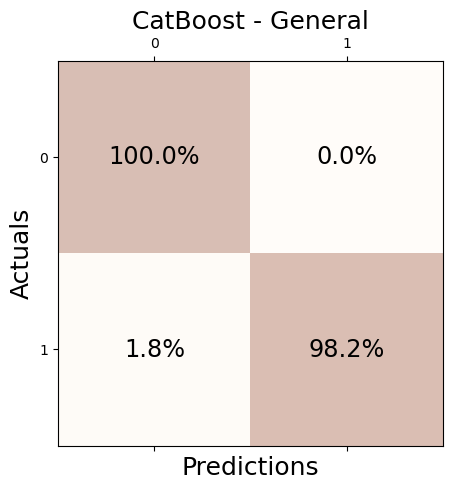

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred.round(0).astype(int),normalize='true')

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=str(round(conf_matrix[i, j]*100,1))+'%', va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('CatBoost - General', fontsize=18)
plt.show()

In [33]:
new_df = df[['age','sex', 'trestbps','fbs',
       'restecg','thalach', 'oldpeak','slope']]

In [34]:
X = new_df.loc[:, new_df.columns != target_col]
y = df.loc[:, target_col]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [36]:
model_cb = CatBoostClassifier()

In [37]:
model_cb.fit(X_train, y_train, plot=True, 
             eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.028872
0:	learn: 0.6758373	test: 0.6778988	best: 0.6778988 (0)	total: 1.7ms	remaining: 1.7s
1:	learn: 0.6573429	test: 0.6605239	best: 0.6605239 (1)	total: 3.05ms	remaining: 1.52s
2:	learn: 0.6380555	test: 0.6424929	best: 0.6424929 (2)	total: 4.35ms	remaining: 1.45s
3:	learn: 0.6229631	test: 0.6285396	best: 0.6285396 (3)	total: 5.8ms	remaining: 1.45s
4:	learn: 0.6130037	test: 0.6194367	best: 0.6194367 (4)	total: 7.13ms	remaining: 1.42s
5:	learn: 0.6077235	test: 0.6140523	best: 0.6140523 (5)	total: 8.39ms	remaining: 1.39s
6:	learn: 0.5983950	test: 0.6049784	best: 0.6049784 (6)	total: 9.76ms	remaining: 1.39s
7:	learn: 0.5847080	test: 0.5929319	best: 0.5929319 (7)	total: 11ms	remaining: 1.37s
8:	learn: 0.5735855	test: 0.5824421	best: 0.5824421 (8)	total: 12.4ms	remaining: 1.36s
9:	learn: 0.5615047	test: 0.5715073	best: 0.5715073 (9)	total: 13.6ms	remaining: 1.34s
10:	learn: 0.5511546	test: 0.5630325	best: 0.5630325 (10)	total: 14.9ms	remaining: 1.34s
11:	learn: 0.542

139:	learn: 0.2121444	test: 0.2610050	best: 0.2610050 (139)	total: 195ms	remaining: 1.2s
140:	learn: 0.2110808	test: 0.2598642	best: 0.2598642 (140)	total: 197ms	remaining: 1.2s
141:	learn: 0.2094864	test: 0.2577609	best: 0.2577609 (141)	total: 199ms	remaining: 1.2s
142:	learn: 0.2089290	test: 0.2573202	best: 0.2573202 (142)	total: 200ms	remaining: 1.2s
143:	learn: 0.2088365	test: 0.2572304	best: 0.2572304 (143)	total: 201ms	remaining: 1.2s
144:	learn: 0.2077211	test: 0.2559862	best: 0.2559862 (144)	total: 203ms	remaining: 1.2s
145:	learn: 0.2068744	test: 0.2554009	best: 0.2554009 (145)	total: 205ms	remaining: 1.2s
146:	learn: 0.2063323	test: 0.2549312	best: 0.2549312 (146)	total: 206ms	remaining: 1.2s
147:	learn: 0.2049165	test: 0.2531248	best: 0.2531248 (147)	total: 208ms	remaining: 1.2s
148:	learn: 0.2040791	test: 0.2524889	best: 0.2524889 (148)	total: 209ms	remaining: 1.2s
149:	learn: 0.2025495	test: 0.2511164	best: 0.2511164 (149)	total: 211ms	remaining: 1.2s
150:	learn: 0.2016336

264:	learn: 0.1174370	test: 0.1734876	best: 0.1734876 (264)	total: 384ms	remaining: 1.06s
265:	learn: 0.1158682	test: 0.1723580	best: 0.1723580 (265)	total: 386ms	remaining: 1.06s
266:	learn: 0.1152760	test: 0.1716425	best: 0.1716425 (266)	total: 387ms	remaining: 1.06s
267:	learn: 0.1142886	test: 0.1710578	best: 0.1710578 (267)	total: 389ms	remaining: 1.06s
268:	learn: 0.1135180	test: 0.1702496	best: 0.1702496 (268)	total: 391ms	remaining: 1.06s
269:	learn: 0.1129116	test: 0.1692096	best: 0.1692096 (269)	total: 392ms	remaining: 1.06s
270:	learn: 0.1121667	test: 0.1686521	best: 0.1686521 (270)	total: 394ms	remaining: 1.06s
271:	learn: 0.1115393	test: 0.1680498	best: 0.1680498 (271)	total: 396ms	remaining: 1.06s
272:	learn: 0.1109295	test: 0.1673367	best: 0.1673367 (272)	total: 397ms	remaining: 1.06s
273:	learn: 0.1105252	test: 0.1667933	best: 0.1667933 (273)	total: 399ms	remaining: 1.05s
274:	learn: 0.1097527	test: 0.1660584	best: 0.1660584 (274)	total: 400ms	remaining: 1.05s
275:	learn

400:	learn: 0.0611645	test: 0.1162616	best: 0.1162616 (400)	total: 586ms	remaining: 875ms
401:	learn: 0.0610393	test: 0.1161083	best: 0.1161083 (401)	total: 588ms	remaining: 874ms
402:	learn: 0.0607389	test: 0.1160648	best: 0.1160648 (402)	total: 589ms	remaining: 873ms
403:	learn: 0.0605541	test: 0.1159974	best: 0.1159974 (403)	total: 591ms	remaining: 872ms
404:	learn: 0.0602653	test: 0.1159834	best: 0.1159834 (404)	total: 593ms	remaining: 871ms
405:	learn: 0.0597604	test: 0.1156053	best: 0.1156053 (405)	total: 594ms	remaining: 870ms
406:	learn: 0.0595772	test: 0.1152219	best: 0.1152219 (406)	total: 596ms	remaining: 869ms
407:	learn: 0.0593339	test: 0.1148940	best: 0.1148940 (407)	total: 598ms	remaining: 867ms
408:	learn: 0.0590291	test: 0.1147954	best: 0.1147954 (408)	total: 599ms	remaining: 865ms
409:	learn: 0.0586382	test: 0.1143802	best: 0.1143802 (409)	total: 600ms	remaining: 864ms
410:	learn: 0.0584248	test: 0.1140875	best: 0.1140875 (410)	total: 602ms	remaining: 862ms
411:	learn

527:	learn: 0.0404086	test: 0.0914741	best: 0.0914741 (527)	total: 774ms	remaining: 692ms
528:	learn: 0.0402743	test: 0.0912289	best: 0.0912289 (528)	total: 775ms	remaining: 690ms
529:	learn: 0.0401738	test: 0.0910702	best: 0.0910702 (529)	total: 777ms	remaining: 689ms
530:	learn: 0.0399643	test: 0.0907289	best: 0.0907289 (530)	total: 779ms	remaining: 688ms
531:	learn: 0.0398064	test: 0.0906827	best: 0.0906827 (531)	total: 780ms	remaining: 686ms
532:	learn: 0.0397324	test: 0.0905238	best: 0.0905238 (532)	total: 782ms	remaining: 685ms
533:	learn: 0.0396549	test: 0.0903848	best: 0.0903848 (533)	total: 784ms	remaining: 684ms
534:	learn: 0.0395578	test: 0.0904443	best: 0.0903848 (533)	total: 786ms	remaining: 683ms
535:	learn: 0.0394812	test: 0.0904279	best: 0.0903848 (533)	total: 787ms	remaining: 682ms
536:	learn: 0.0394743	test: 0.0904101	best: 0.0903848 (533)	total: 789ms	remaining: 680ms
537:	learn: 0.0393705	test: 0.0902699	best: 0.0902699 (537)	total: 790ms	remaining: 679ms
538:	learn

646:	learn: 0.0294234	test: 0.0793760	best: 0.0793760 (646)	total: 958ms	remaining: 523ms
647:	learn: 0.0293277	test: 0.0792943	best: 0.0792943 (647)	total: 960ms	remaining: 521ms
648:	learn: 0.0292949	test: 0.0792736	best: 0.0792736 (648)	total: 961ms	remaining: 520ms
649:	learn: 0.0291972	test: 0.0793049	best: 0.0792736 (648)	total: 963ms	remaining: 519ms
650:	learn: 0.0291099	test: 0.0790980	best: 0.0790980 (650)	total: 965ms	remaining: 517ms
651:	learn: 0.0290520	test: 0.0792010	best: 0.0790980 (650)	total: 967ms	remaining: 516ms
652:	learn: 0.0289688	test: 0.0790510	best: 0.0790510 (652)	total: 979ms	remaining: 520ms
653:	learn: 0.0289156	test: 0.0790843	best: 0.0790510 (652)	total: 982ms	remaining: 519ms
654:	learn: 0.0287657	test: 0.0788291	best: 0.0788291 (654)	total: 984ms	remaining: 518ms
655:	learn: 0.0287171	test: 0.0787645	best: 0.0787645 (655)	total: 985ms	remaining: 517ms
656:	learn: 0.0286829	test: 0.0787242	best: 0.0787242 (656)	total: 987ms	remaining: 515ms
657:	learn

758:	learn: 0.0225583	test: 0.0723359	best: 0.0722326 (756)	total: 1.15s	remaining: 364ms
759:	learn: 0.0224988	test: 0.0721159	best: 0.0721159 (759)	total: 1.15s	remaining: 362ms
760:	learn: 0.0224458	test: 0.0721022	best: 0.0721022 (760)	total: 1.15s	remaining: 361ms
761:	learn: 0.0223997	test: 0.0720178	best: 0.0720178 (761)	total: 1.15s	remaining: 360ms
762:	learn: 0.0223455	test: 0.0718699	best: 0.0718699 (762)	total: 1.15s	remaining: 358ms
763:	learn: 0.0223201	test: 0.0718271	best: 0.0718271 (763)	total: 1.15s	remaining: 357ms
764:	learn: 0.0222519	test: 0.0718492	best: 0.0718271 (763)	total: 1.16s	remaining: 355ms
765:	learn: 0.0222201	test: 0.0718036	best: 0.0718036 (765)	total: 1.16s	remaining: 354ms
766:	learn: 0.0221770	test: 0.0718035	best: 0.0718035 (766)	total: 1.16s	remaining: 353ms
767:	learn: 0.0221587	test: 0.0717450	best: 0.0717450 (767)	total: 1.16s	remaining: 351ms
768:	learn: 0.0221137	test: 0.0716414	best: 0.0716414 (768)	total: 1.16s	remaining: 350ms
769:	learn

886:	learn: 0.0176309	test: 0.0681602	best: 0.0681489 (873)	total: 1.35s	remaining: 172ms
887:	learn: 0.0175946	test: 0.0681587	best: 0.0681489 (873)	total: 1.35s	remaining: 170ms
888:	learn: 0.0175722	test: 0.0680747	best: 0.0680747 (888)	total: 1.35s	remaining: 169ms
889:	learn: 0.0175277	test: 0.0681791	best: 0.0680747 (888)	total: 1.35s	remaining: 167ms
890:	learn: 0.0175074	test: 0.0681700	best: 0.0680747 (888)	total: 1.35s	remaining: 166ms
891:	learn: 0.0174505	test: 0.0682361	best: 0.0680747 (888)	total: 1.36s	remaining: 164ms
892:	learn: 0.0174256	test: 0.0680901	best: 0.0680747 (888)	total: 1.36s	remaining: 163ms
893:	learn: 0.0174075	test: 0.0680761	best: 0.0680747 (888)	total: 1.36s	remaining: 161ms
894:	learn: 0.0174063	test: 0.0680685	best: 0.0680685 (894)	total: 1.36s	remaining: 160ms
895:	learn: 0.0173450	test: 0.0682070	best: 0.0680685 (894)	total: 1.36s	remaining: 158ms
896:	learn: 0.0173118	test: 0.0682152	best: 0.0680685 (894)	total: 1.36s	remaining: 157ms
897:	learn

In [38]:
y_pred = model_cb.predict(X_test)

In [39]:
classification_report2 = classification_report(y_test, y_pred)
print(classification_report2)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       171
           1       1.00      0.96      0.98       168

    accuracy                           0.98       339
   macro avg       0.98      0.98      0.98       339
weighted avg       0.98      0.98      0.98       339



In [40]:
model_cb.tree_count_

1000

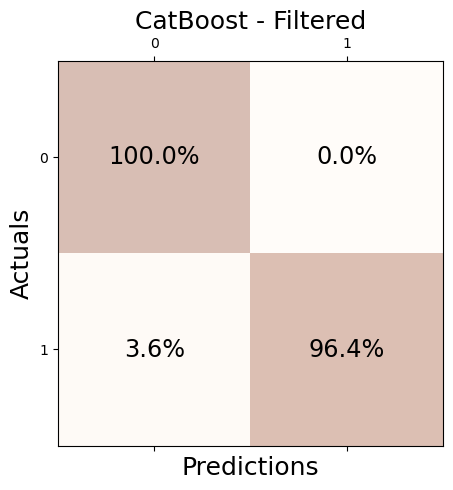

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred.round(0).astype(int),normalize='true')

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=str(round(conf_matrix[i, j]*100,1))+'%', va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('CatBoost - Filtered', fontsize=18)
plt.show()